Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bikes_df = pd.read_csv('../data/bikes_df_eda.csv') 
foursq_df = pd.read_csv('../data/fs_df_eda.csv')
yelp_df = pd.read_csv('../data/yp_df_eda.csv')

In [3]:
# Merging bikes_df with foursq_df on longitude and latitude columns
bikes_fs = pd.merge(bikes_df, foursq_df, on=['longitude','latitude'], how='outer')

# Merging bikes_fs with yelp_df on longitude and latitude columns, resulting in the full dataframe
full_df = pd.merge(bikes_fs, yelp_df, on=['longitude','latitude'], how='outer')
full_df

,bike_stn_id,station_name,latitude,longitude,bikes_available,bikes_taken,bikes_total,percent_avail,percent_taken,fs_distance_avg,...,yp_name_count,yp_review_count_avg,yp_review_count_max,yp_review_count_min,yp_price_avg,yp_price_max,yp_price_min,yp_rating_avg,yp_rating_max,yp_rating_min
0,1,Cultural,-32.884090,-68.848970,7,0,7,100.00,0.00,582.25,...,17,15.94,66,2,1.82,4.0,0.0,4.56,5.0,4.0
1,2,Plaza Independencia,-32.889500,-68.846000,17,0,17,100.00,0.00,480.00,...,19,16.26,66,2,1.79,4.0,0.0,4.50,5.0,4.0
2,3,Muni,-32.897942,-68.842463,7,0,7,100.00,0.00,739.58,...,11,5.45,24,1,0.91,3.0,0.0,4.45,5.0,4.0
3,4,Terminal,-32.893822,-68.829655,2,0,2,100.00,0.00,788.95,...,4,3.00,6,1,0.75,2.0,0.0,2.50,3.5,1.0
4,5,Benegas,-32.952390,-68.853749,10,0,10,100.00,0.00,553.00,...,7,0.71,2,0,0.29,2.0,0.0,1.50,5.0,0.0
5,6,Chacabuco,-32.916315,-68.851184,4,0,4,100.00,0.00,743.08,...,3,13.67,38,1,2.00,4.0,0.0,3.00,4.0,1.0
6,7,Pescarmona,-32.922855,-68.839564,5,0,5,100.00,0.00,708.62,...,8,0.25,2,0,0.00,0.0,0.0,0.62,5.0,0.0
7,8,Parque Lineal,-32.870624,-68.843329,8,0,8,100.00,0.00,776.60,...,3,1.00,3,0,0.67,2.0,0.0,1.50,4.5,0.0
8,9,EA Aristides,-32.891200,-68.860200,4,12,16,25.00,75.00,543.79,...,17,7.65,21,1,1.71,3.0,0.0,4.35,5.0,3.5
9,10,EA Muni,-32.898100,-68.843100,1,2,3,33.33,66.67,679.95,...,12,5.17,24,1,0.83,3.0,0.0,4.42,5.0,4.0


In [4]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bike_stn_id          21 non-null     int64  
 1   station_name         21 non-null     object 
 2   latitude             21 non-null     float64
 3   longitude            21 non-null     float64
 4   bikes_available      21 non-null     int64  
 5   bikes_taken          21 non-null     int64  
 6   bikes_total          21 non-null     int64  
 7   percent_avail        21 non-null     float64
 8   percent_taken        21 non-null     float64
 9   fs_distance_avg      21 non-null     float64
 10  fs_distance_max      21 non-null     int64  
 11  fs_distance_min      21 non-null     int64  
 12  fs_name_count        21 non-null     int64  
 13  fs_popularity_avg    21 non-null     float64
 14  fs_popularity_max    21 non-null     float64
 15  fs_popularity_min    21 non-null     float

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [ ]:
# Code provided to generate the pairplots. I added an image of the results side-by-side to compare in the notebook. Images are available in '../images'

# Bike data and Foursquare data
sns.set(style="ticks", color_codes=True)
sns.pairplot(full_df, diag_kind="kde", vars=['bikes_total','percent_taken','fs_name_count','fs_distance_avg','fs_popularity_avg', 'fs_price_avg', 'fs_rating_avg'])
plt.savefig('../images/pairplotfs.png', dpi=300, bbox_inches='tight')
plt.show()

# Bike data and Yelp data
sns.set(style="ticks", color_codes=True)
sns.pairplot(full_df, diag_kind="kde", vars=['bikes_total','percent_taken','yp_name_count','yp_distance_avg','yp_review_count_avg', 'yp_price_avg', 'yp_rating_avg'])
plt.savefig('../images/pairplotyp.png', dpi=300, bbox_inches='tight')
plt.show()

Foursquare and Yelp pairplots against bike data

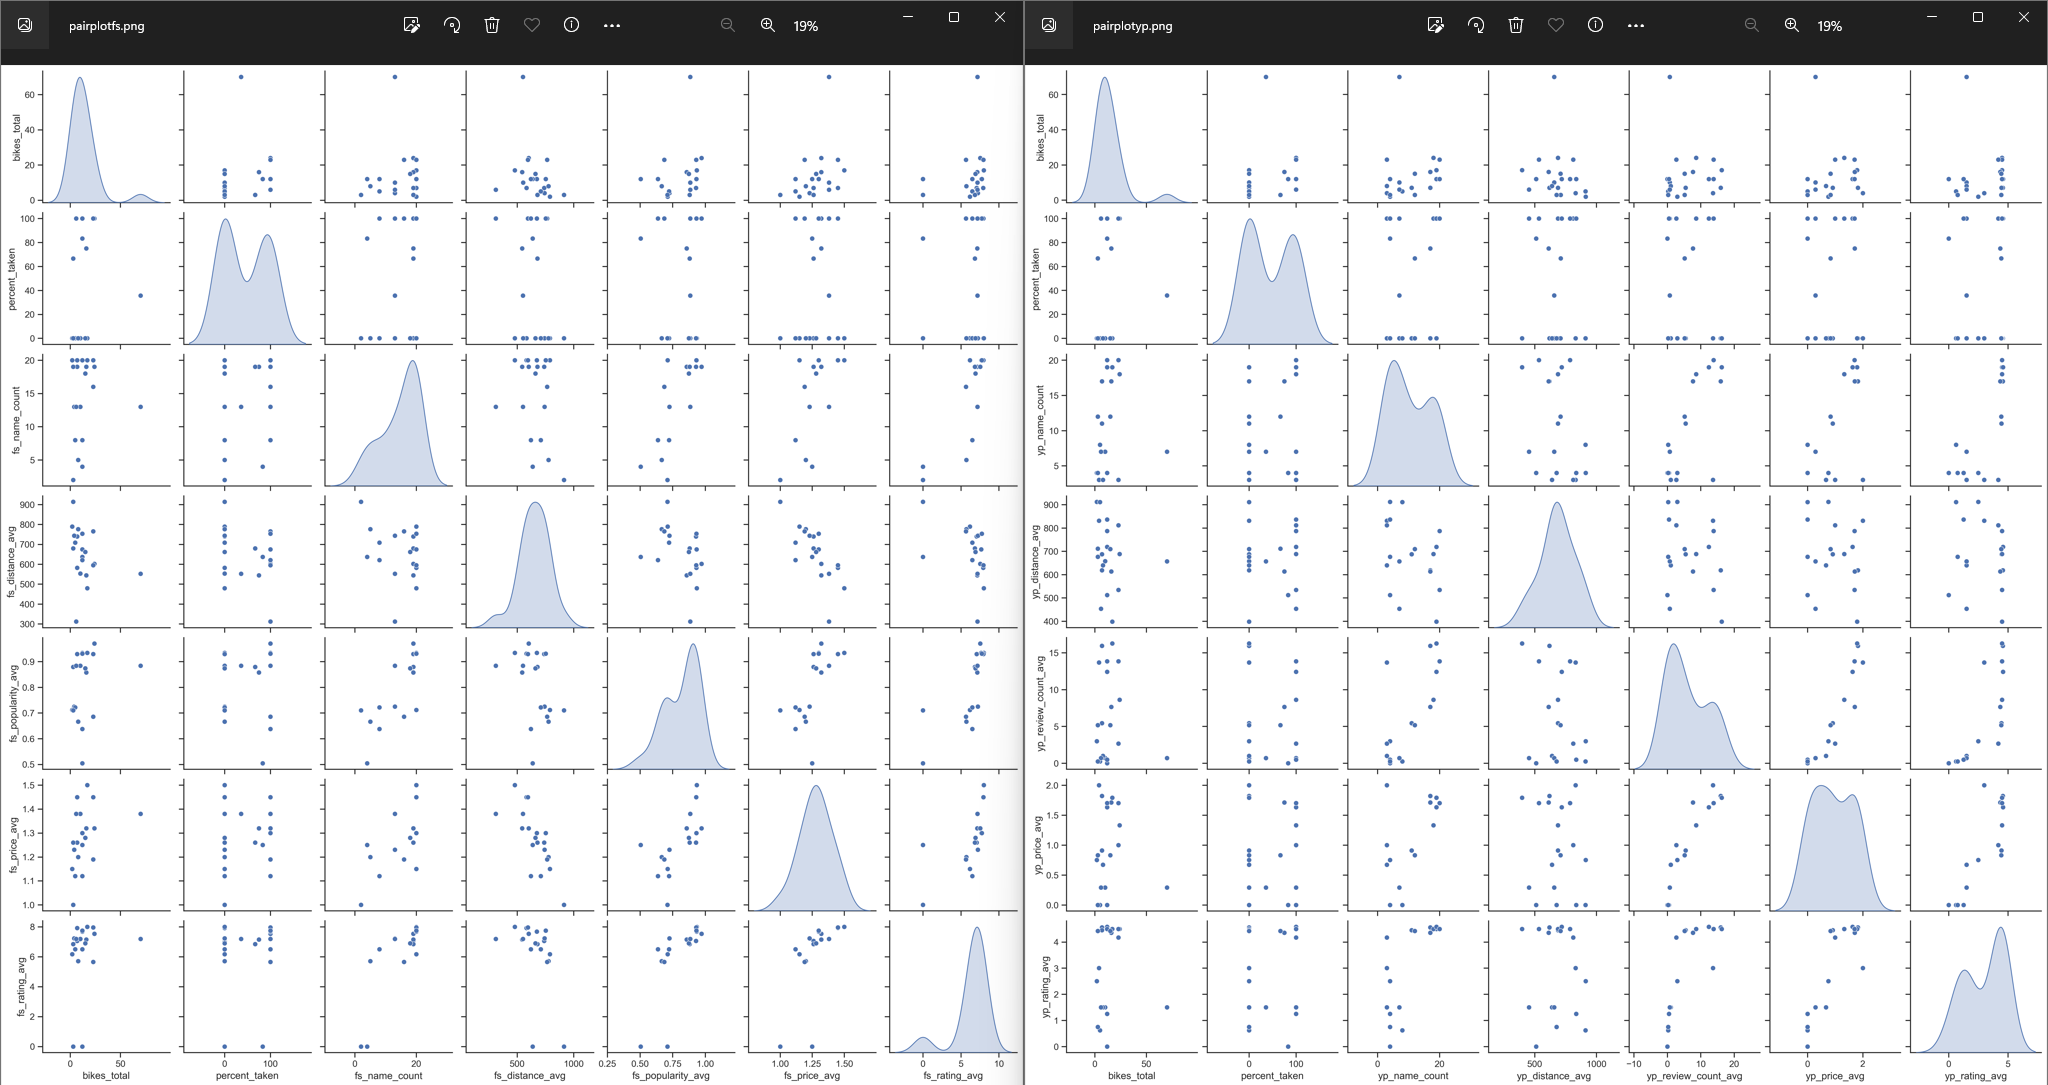

In [5]:
# Selecting columns of interest from the full_df dataframe
fsdf_pick = full_df[['bikes_total','percent_taken','fs_distance_avg','fs_rating_avg','fs_popularity_avg','fs_price_avg','fs_name_count']]

In [7]:
# Correlation matrix for Foursquare columns added to fsdf_pick
fs_correlation_matrix = fsdf_pick.corr(numeric_only=True)

In [8]:
# Result saved as csv file
fs_correlation_matrix.to_csv('../data/fs_correlation_matrix.csv')

In [9]:
# Selecting Yelp columns of interest from the full_df dataframe
ypdf_pick = full_df[['bikes_total','percent_taken','yp_distance_avg','yp_rating_avg','yp_price_avg','yp_name_count']]

In [11]:
# Correlation matrix for Yelp columns added to ypdf_pick
yp_correlation_matrix = ypdf_pick.corr(numeric_only=True)

# Result saved as csv file
yp_correlation_matrix.to_csv('../data/yp_correlation_matrix.csv')

In [ ]:
# Code provided to generate the heatmaps. I added an image of the results side-by-side to compare in the notebook. Images are available in '../images'

# Creating fs_correlation_matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(fs_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Foursquare Correlation Heatmap")
plt.savefig('../images/fs_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

# Creating yp_correlation_matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(yp_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Yelp Correlation Heatmap")
plt.savefig('../images/yp_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

Foursquare and Yelp Heatmaps

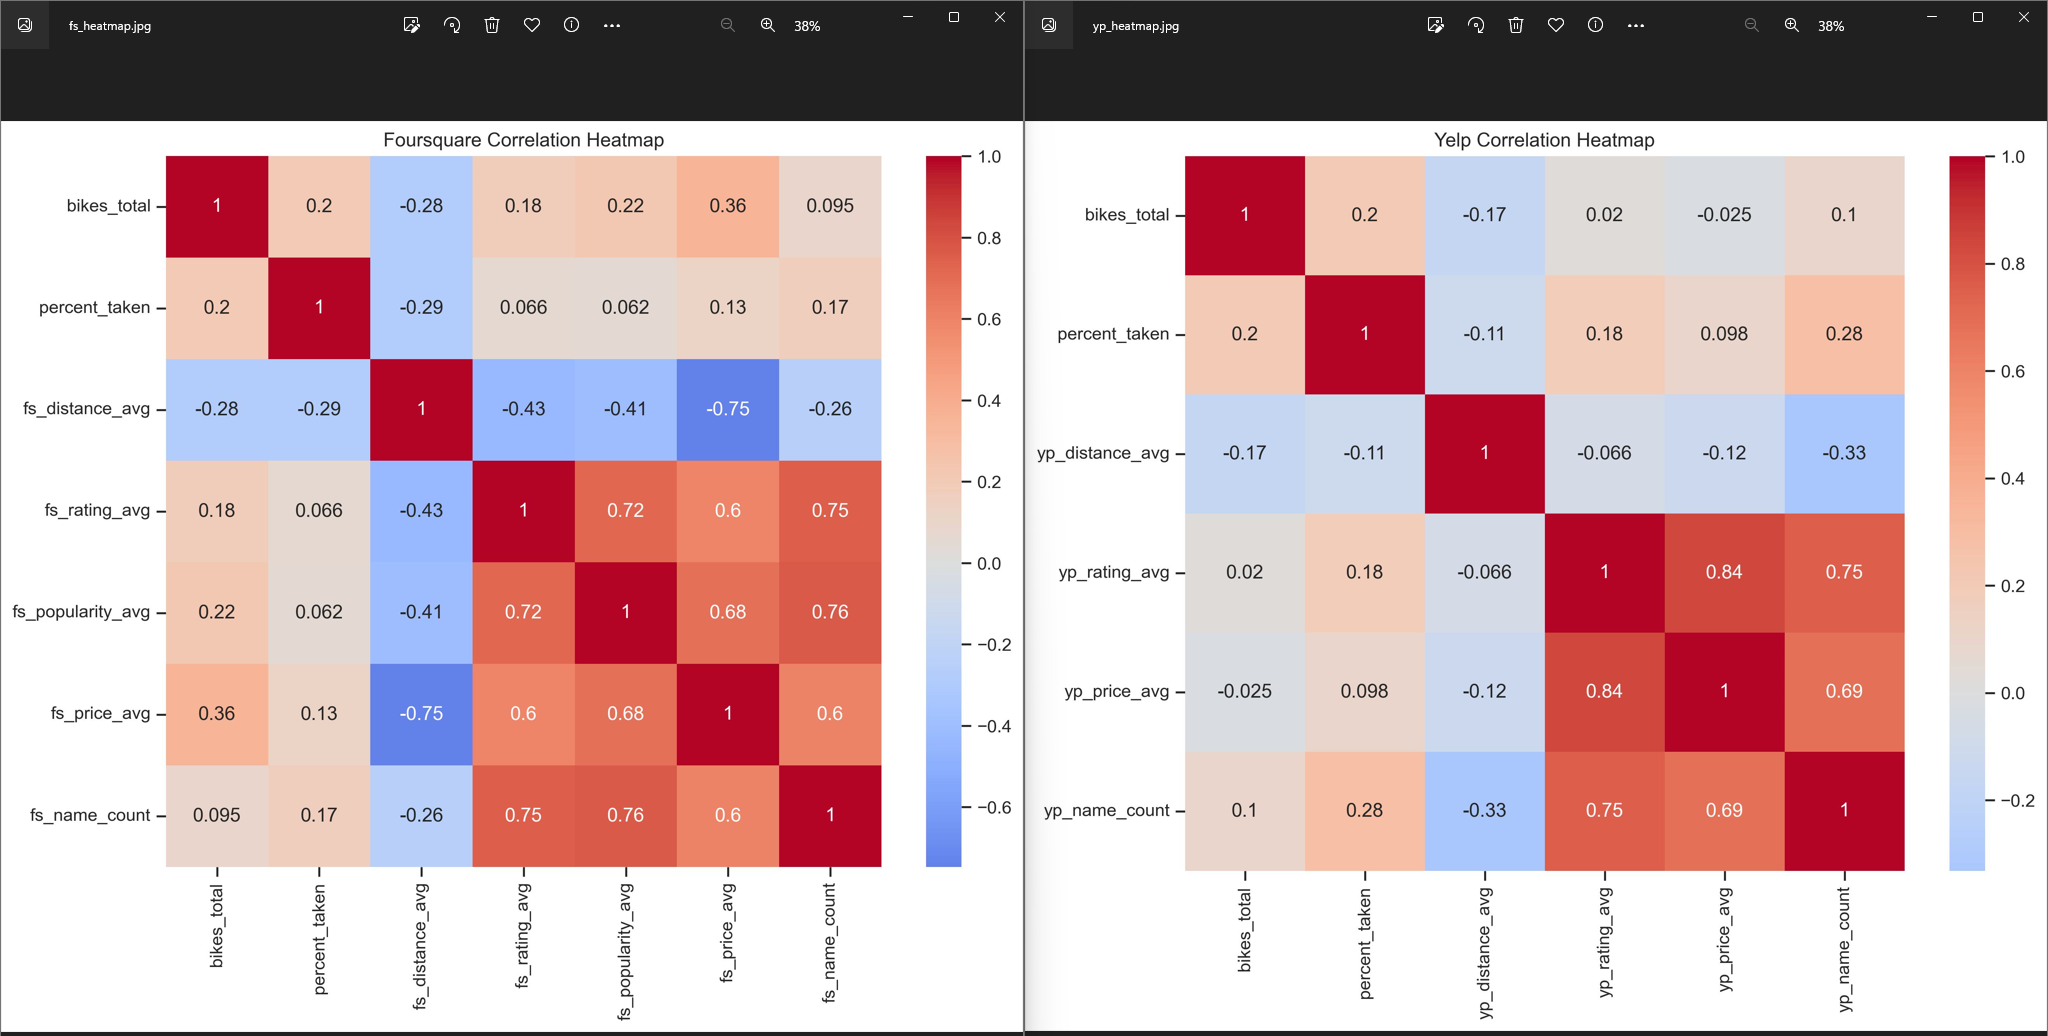

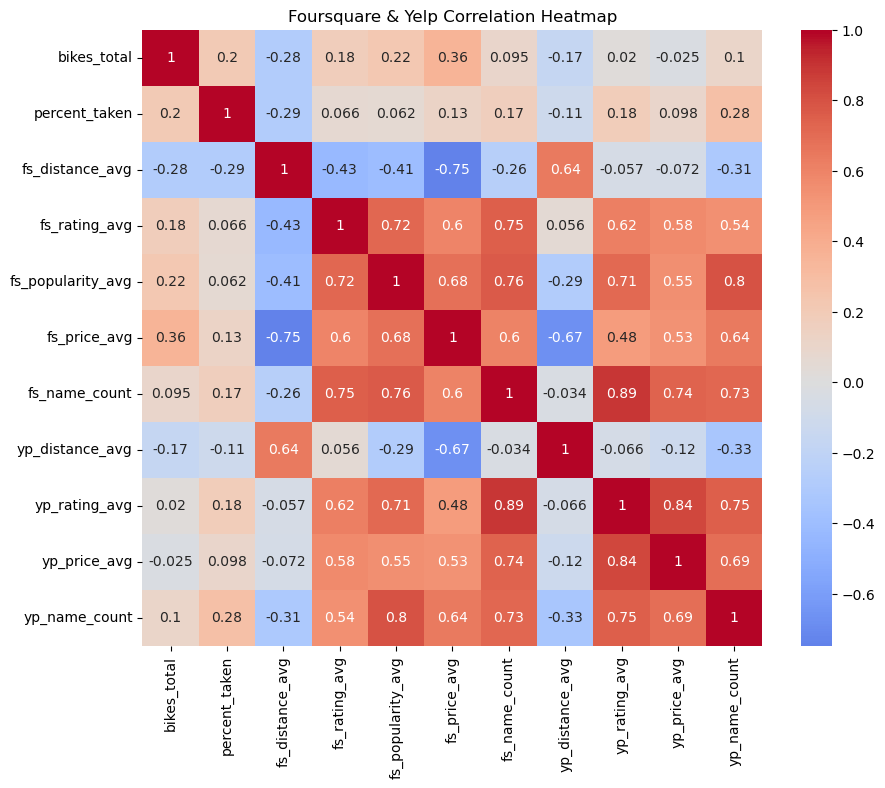

In [12]:
# Selecting columns of interest from the full_df dataframe
combo_pick = full_df[['bikes_total','percent_taken','fs_distance_avg','fs_rating_avg','fs_popularity_avg','fs_price_avg','fs_name_count','yp_distance_avg','yp_rating_avg','yp_price_avg','yp_name_count']]

# Correlation matrix for Foursquare columns added to fsdf_pick
combo_correlation_matrix = combo_pick.corr(numeric_only=True)

# Result saved as csv file
combo_correlation_matrix.to_csv('../data/combo_correlation_matrix.csv')

# Creating combo_correlation_matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(combo_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Foursquare & Yelp Correlation Heatmap")
plt.savefig('../images/combo_heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

Correlations appear low between bike data and Foursquare or Yelp data.

In [13]:
# Narrowing down columns of interest from full_df into model_df
model_df = full_df[['bikes_total','percent_taken','fs_distance_avg','fs_name_count','fs_popularity_avg','fs_price_avg','fs_rating_avg','yp_distance_avg','yp_name_count','yp_price_avg','yp_rating_avg']]
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bikes_total        21 non-null     int64  
 1   percent_taken      21 non-null     float64
 2   fs_distance_avg    21 non-null     float64
 3   fs_name_count      21 non-null     int64  
 4   fs_popularity_avg  21 non-null     float64
 5   fs_price_avg       21 non-null     float64
 6   fs_rating_avg      21 non-null     float64
 7   yp_distance_avg    21 non-null     float64
 8   yp_name_count      21 non-null     int64  
 9   yp_price_avg       21 non-null     float64
 10  yp_rating_avg      21 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 1.9 KB


In [14]:
model_df.to_csv('../data/model_df.csv', index=False)

**Note added after Part 4: Building a Model**

A robust model could not be built capturing a relationship between bike stations and restaurants. I also tried to remove bike station "EA Benegas" with 70 bikes and re-ran through backward selection but the change did not make a difference in the results.

As an FYI, here are the pairplot of variables if "EA Benegas" is removed. These images are not in '../images'

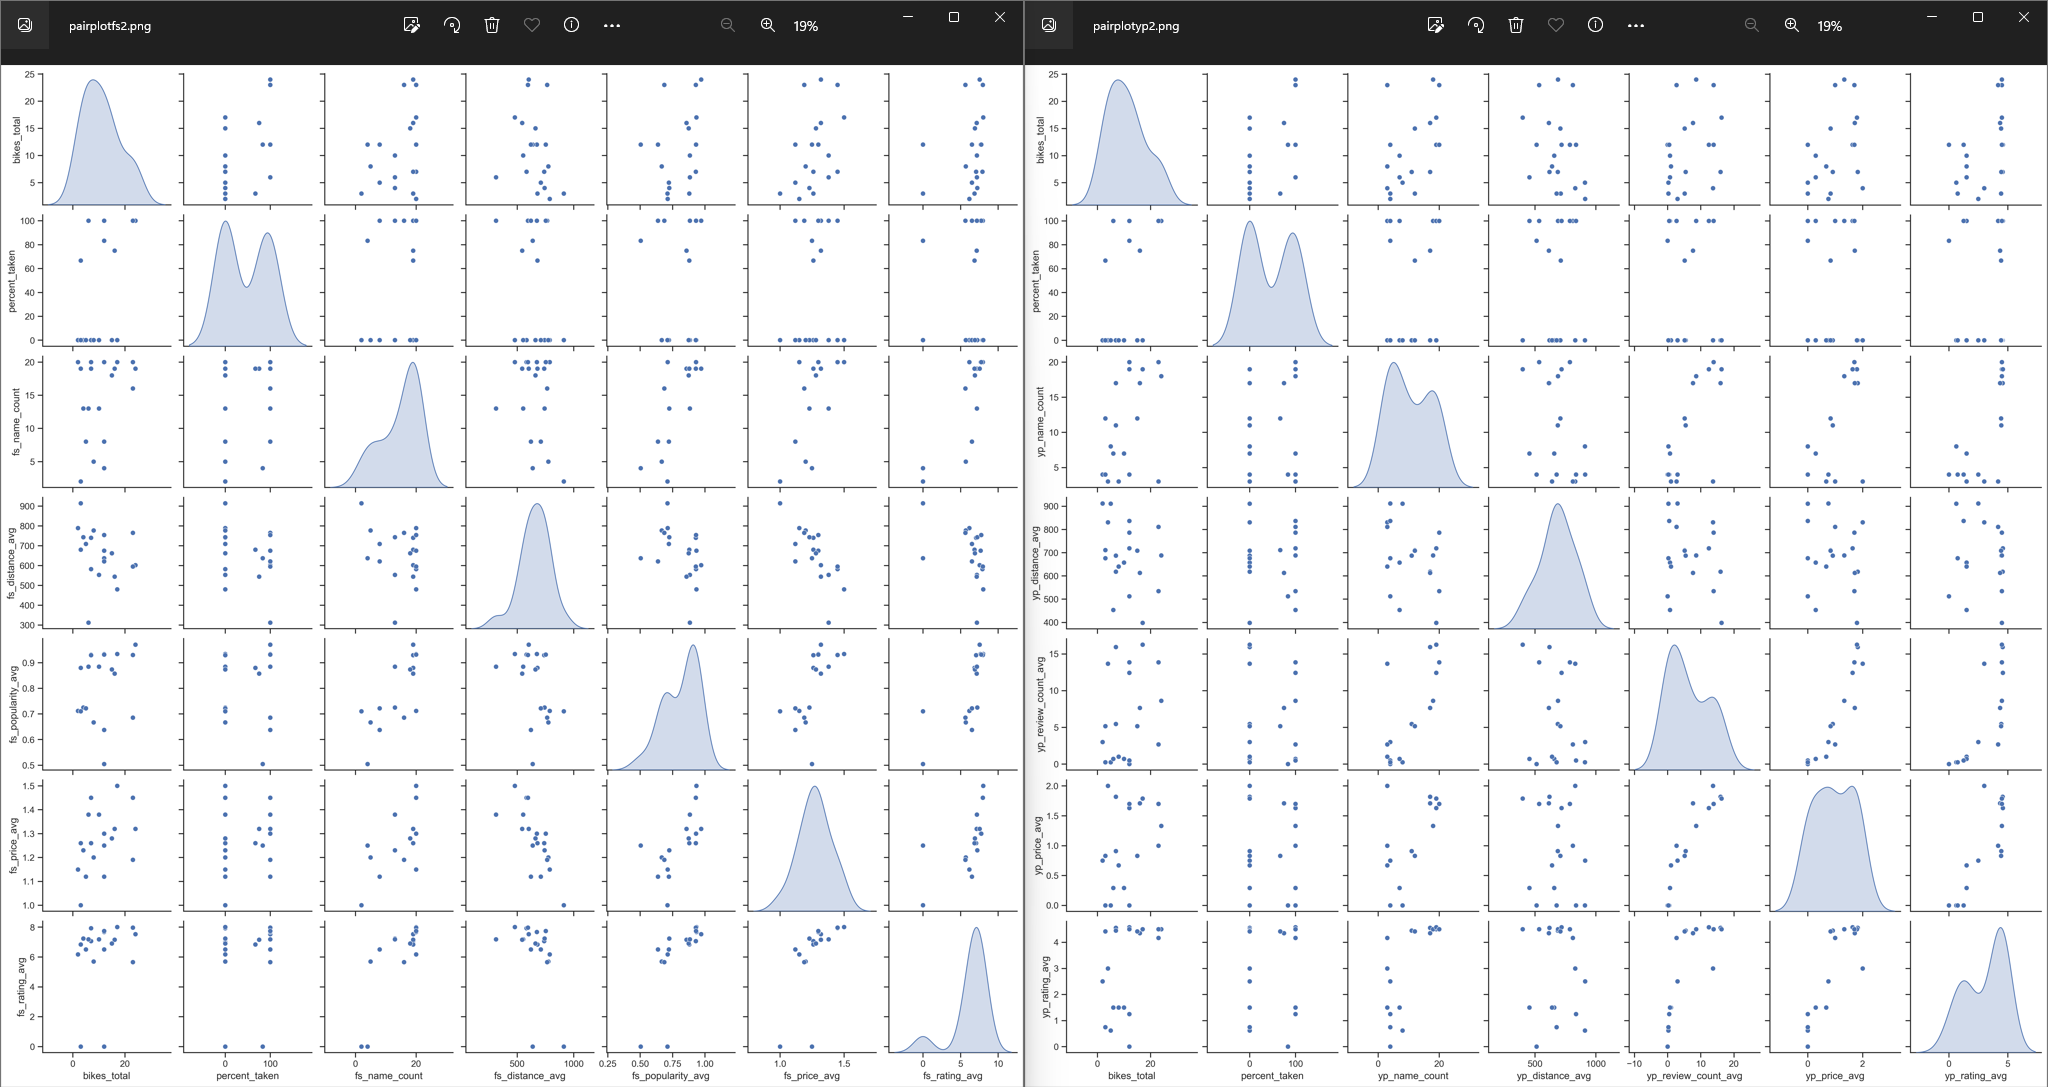

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [15]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

connection = create_connection("../data/bikes_resto.sqlite")

Connection to SQLite DB successful


In [16]:
# Add dataframes
bikes_df.to_sql('bikes', connection, if_exists='replace', index=False)
foursq_df.to_sql('foursquare', connection, if_exists='replace', index=False)
yelp_df.to_sql('yelp', connection, if_exists='replace', index=False)

21

In [17]:
#Close the connection
connection.close()

Look at the data before and after the join to validate your data.

In [18]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")
        
connection = create_connection("../data/bikes_resto.sqlite")

Connection to SQLite DB successful


In [19]:
# Query 'bikes' table to validate data loaded
bikes_query = "SELECT * FROM bikes"
bikes = execute_read_query(connection, bikes_query)

for station in bikes:
    print(station)

connection.close()

(1, 'Cultural', -32.88409, -68.84897, 7, 0, 7, 100.0, 0.0)
(2, 'Plaza Independencia', -32.8895, -68.846, 17, 0, 17, 100.0, 0.0)
(3, 'Muni', -32.897942, -68.842463, 7, 0, 7, 100.0, 0.0)
(4, 'Terminal', -32.8938219, -68.8296553, 2, 0, 2, 100.0, 0.0)
(5, 'Benegas', -32.9523902, -68.8537488, 10, 0, 10, 100.0, 0.0)
(6, 'Chacabuco', -32.9163148, -68.8511836, 4, 0, 4, 100.0, 0.0)
(7, 'Pescarmona', -32.9228551, -68.839564, 5, 0, 5, 100.0, 0.0)
(8, 'Parque Lineal', -32.8706243, -68.8433289, 8, 0, 8, 100.0, 0.0)
(9, 'EA Aristides', -32.8912, -68.8602, 4, 12, 16, 25.0, 75.0)
(10, 'EA Muni', -32.8981, -68.8431, 1, 2, 3, 33.33, 66.67)
(11, 'EA - Kilómetro 0', -32.8907, -68.8387, 0, 24, 24, 0.0, 100.0)
(12, 'EA Plaza San Martín', -32.8871, -68.8407, 0, 12, 12, 0.0, 100.0)
(13, 'EA - Belgrano', -32.8937, -68.8512, 0, 23, 23, 0.0, 100.0)
(14, "EA Parque O'Higgins", -32.8847, -68.8296, 0, 23, 23, 0.0, 100.0)
(15, 'EA Pedro Molina', -32.8961, -68.8459, 0, 12, 12, 0.0, 100.0)
(16, 'Bicis Eléctricas', -32